In [216]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [217]:
#Import data
data = pd.read_csv("data.csv")
data.head(100)

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Apple,MacBook Pro,13 Inches,NaN,256 GB,Apple M1,16 GB,macOS 12 Monterey,NaN,Integrated,NaN,3.4 GHz,4.7,"$1,457.99"
96,HP,HP 15 scarlet red,15.6 Inches,Silver,1 TB,Celeron,16 GB,Windows 11 Home,NaN,Integrated,Intel UHD Graphics,NaN,4.3,$469.00
97,Carlisle FoodService Products,ASUS VivoBook L203,11.6 Inches,Black,64 GB,Celeron N4000,4 GB,Windows 10 S,NaN,Integrated,Intel UHD Graphics 600,NaN,4.2,$134.90
98,Gigabyte,G5 KF-E3US333SH,15.6 Inches,Black,512 GB,Core i5,8 GB,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 4060,NaN,4.0,$879.99


In [218]:
# A summary of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 4446 non-null   object 
 1   model                 3282 non-null   object 
 2   screen_size           4417 non-null   object 
 3   color                 3867 non-null   object 
 4   harddisk              3870 non-null   object 
 5   cpu                   4346 non-null   object 
 6   ram                   4385 non-null   object 
 7   OS                    4420 non-null   object 
 8   special_features      2054 non-null   object 
 9   graphics              4381 non-null   object 
 10  graphics_coprocessor  2574 non-null   object 
 11  cpu_speed             1520 non-null   object 
 12  rating                2174 non-null   float64
 13  price                 4441 non-null   object 
dtypes: float64(1), object(13)
memory usage: 486.4+ KB


In [219]:
data.shape

(4446, 14)

In [220]:
#Instead of using the original dataset, I decided to use a copy of the original
data1 = data.copy()

# Data Preprocessing

Cleaning data is a crucial step in the data analysis process, especially when you're preparing data for visualization.

## Handling Missing values

There are 3 ways to handle missing values
1. Removing columns with missing values
2. Impute missing value with mean, median, or mode
3. Using forward fill or backward fill for time-series data

In [221]:
#Identify columns with missing values
columns_with_missing_values = data1.columns[data1.isnull().any()]
columns_with_missing_values

Index(['model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram', 'OS',
       'special_features', 'graphics', 'graphics_coprocessor', 'cpu_speed',
       'rating', 'price'],
      dtype='object')

# Approach 1 : Removing rows or columns with missing values

In [222]:
data1 = data1.dropna()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 0 non-null      object 
 1   model                 0 non-null      object 
 2   screen_size           0 non-null      object 
 3   color                 0 non-null      object 
 4   harddisk              0 non-null      object 
 5   cpu                   0 non-null      object 
 6   ram                   0 non-null      object 
 7   OS                    0 non-null      object 
 8   special_features      0 non-null      object 
 9   graphics              0 non-null      object 
 10  graphics_coprocessor  0 non-null      object 
 11  cpu_speed             0 non-null      object 
 12  rating                0 non-null      float64
 13  price                 0 non-null      object 
dtypes: float64(1), object(13)
memory usage: 0.0+ bytes


This method is not effective because most all columns have missing values thus removed all data. 
What we can do is remove several columns that have many null values

In [223]:
data2 = data.copy()


# Dropping columns with many null values

data2 = data2.drop(['rating','cpu_speed', 'special_features', 'graphics_coprocessor'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        4446 non-null   object
 1   model        3282 non-null   object
 2   screen_size  4417 non-null   object
 3   color        3867 non-null   object
 4   harddisk     3870 non-null   object
 5   cpu          4346 non-null   object
 6   ram          4385 non-null   object
 7   OS           4420 non-null   object
 8   graphics     4381 non-null   object
 9   price        4441 non-null   object
dtypes: object(10)
memory usage: 347.5+ KB


# Approach 2 : Impute missing values with mean, median, or mode

In [224]:
#Find numeric values from the dataset. 
#In our case, the only numeric dataset is the key
#This means that even the price is not numeric

numeric_columns = data2.select_dtypes(include=int)
numeric_columns.head()


""
0
1
2
3
4


Counting the frequency of brand, creating a piechart using that data


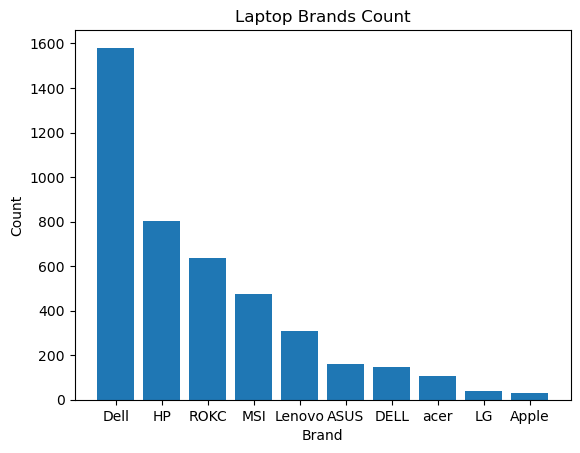

In [247]:
brand_counts = data2['brand'].value_counts()

# Creating a dataframe from this information
brand_counts_df = pd.DataFrame({'Brand': brand_counts.index,
                                'Count': brand_counts.values})

# Sort the df in a descending order
brand_counts_df = brand_counts_df.sort_values(by='Count', ascending=False)

# Plotting a bar chart using this information

plt.bar(brand_counts_df['Brand'].head(10), brand_counts_df['Count'].head(10))
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Laptop Brands Count')
plt.show()

In [ ]:
brand_counts = data2['brand'].isnull().value_counts()
brand_counts

There is no null type for the brand column

In [241]:
# We can replace missing values with dell

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        4446 non-null   object
 1   model        3282 non-null   object
 2   screen_size  4417 non-null   object
 3   color        3867 non-null   object
 4   harddisk     3870 non-null   object
 5   cpu          4346 non-null   object
 6   ram          4385 non-null   object
 7   OS           4420 non-null   object
 8   graphics     4381 non-null   object
 9   price        4441 non-null   object
dtypes: object(10)
memory usage: 347.5+ KB


In [235]:
null_values = data2['cpu'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4441    False
4442    False
4443    False
4444    False
4445    False
Name: cpu, Length: 4446, dtype: bool

In [153]:
datas = {
  'A':[1,2,3,np.nan,5,6,np.nan],
  'B':[8,np.nan,10,11,12,13,np.nan]
}

datas = pd.DataFrame(data)
datas

,A,B
0,1.0,8.0
1,2.0,NaN
2,3.0,10.0
3,NaN,11.0
4,5.0,12.0
5,6.0,13.0
6,NaN,NaN


In [163]:
datas = datas.dropna()
datas

,A,B
0,1.0,8.0
2,3.0,10.0
4,5.0,12.0
5,6.0,13.0
